<a href="https://colab.research.google.com/github/ravindrabharathi/eip3/blob/master/Test_Random_Eraser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Test Random Eraser  

###Import necessary Modules 

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

###create train and test data using cifar10 dataset in Keras 

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

###Plot some of the images in the dataset along with class label

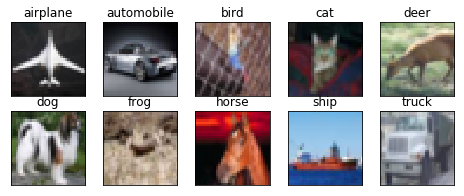

In [23]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

###Scale the input features to be within 0 and 1 
###convert the train and test labels to 10 class category format 

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

### get Random eraser 

In [25]:
!wget https://raw.githubusercontent.com/yu4u/cutout-random-erasing/master/random_eraser.py

--2019-07-08 04:38:24--  https://raw.githubusercontent.com/yu4u/cutout-random-erasing/master/random_eraser.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 888 [text/plain]
Saving to: ‘random_eraser.py.1’

random_eraser.py.1  100%[===================>]     888  --.-KB/s    in 0s      

2019-07-08 04:38:24 (37.1 MB/s) - ‘random_eraser.py.1’ saved [888/888]



In [0]:
from random_eraser import get_random_eraser 

  

### apply random eraser as a preprocessing function of Imagedatagenerator 

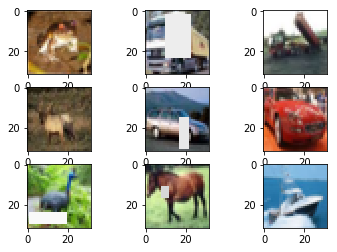

In [28]:
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(preprocessing_function=get_random_eraser(v_l=0,v_h=1))





for X_batch, y_batch in datagen.flow(train_features, train_labels, batch_size = 9,shuffle=False):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(32, 32, 3))
	# show the plot
	plt.show()
	break

### next run without random_eraser gives images without cutout 

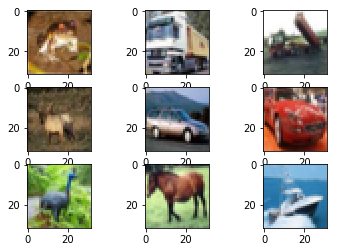

In [29]:
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator()





for X_batch, y_batch in datagen.flow(train_features, train_labels, batch_size = 9,shuffle=False):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(32, 32, 3))
	# show the plot
	plt.show()
	break

### check the original train dataset to confirm that original images were not affected 

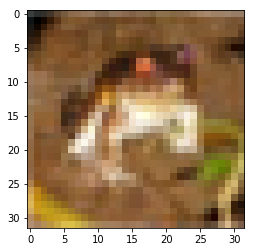

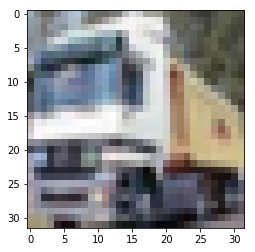

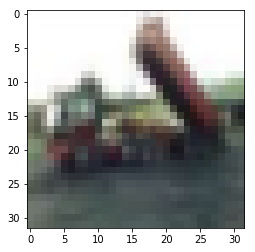

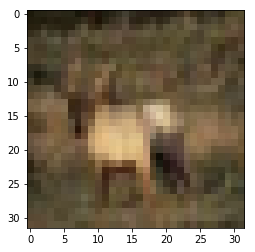

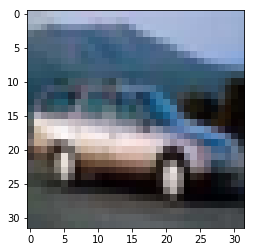

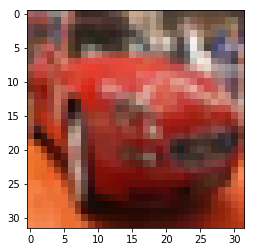

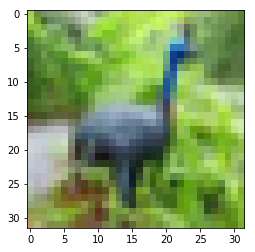

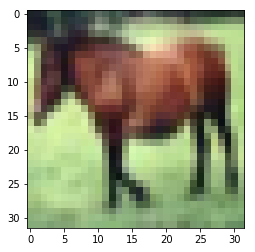

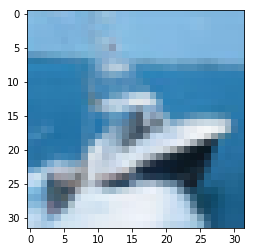

In [30]:
for i in range(9):
  plt.imshow(train_features[i])
  plt.show()

###apply random eraser on the train dataset directly 

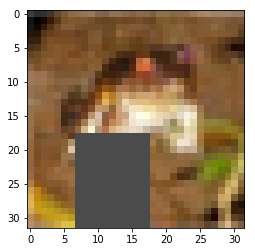

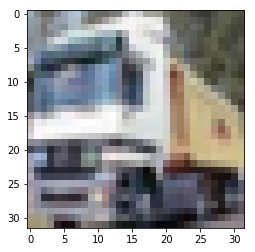

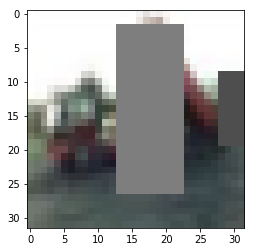

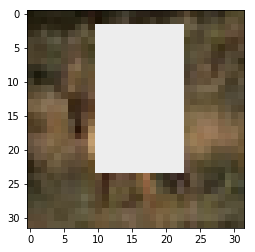

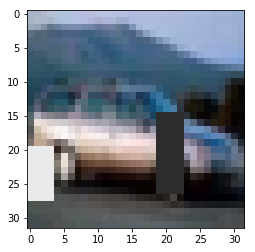

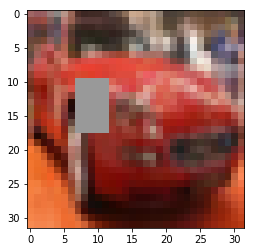

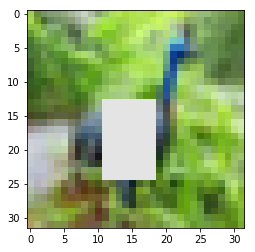

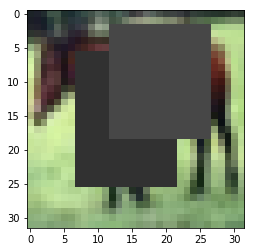

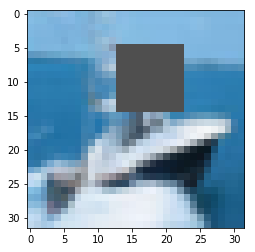

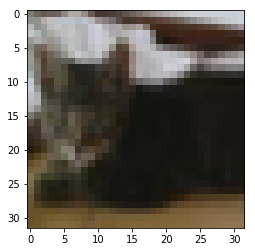

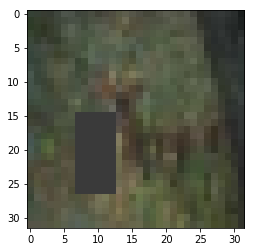

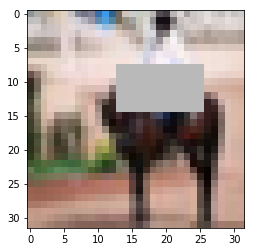

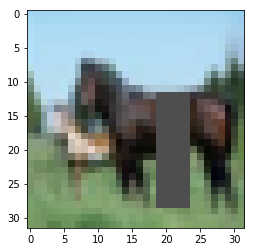

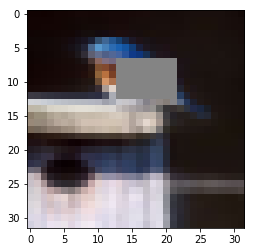

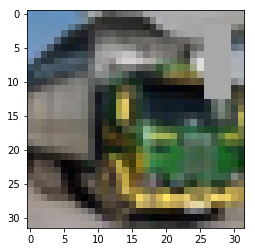

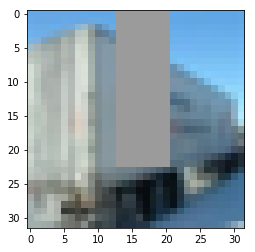

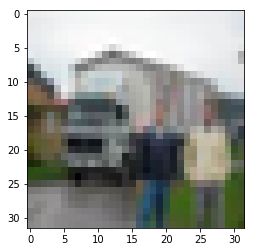

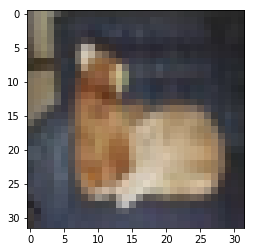

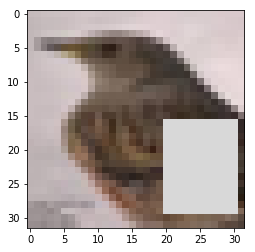

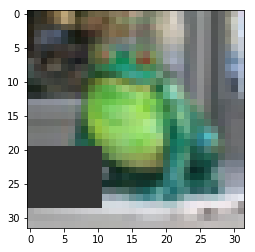

In [9]:
for i in range(20):
  eraser=get_random_eraser(v_l=0,v_h=1)
  img=eraser(train_features[i])
  plt.imshow(img)
  plt.show()

### plot the images to check if they cutout change has permanently changed the images in the original dataset 

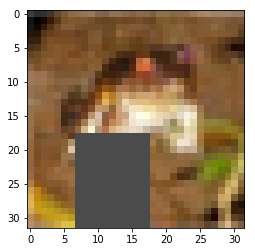

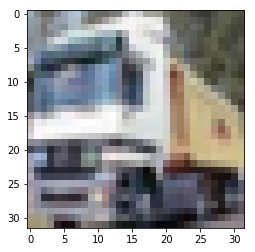

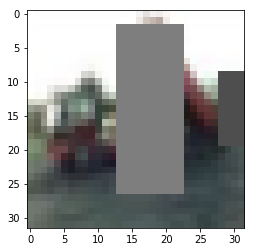

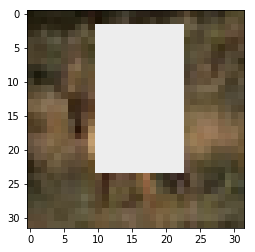

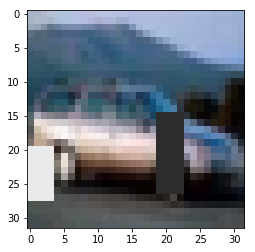

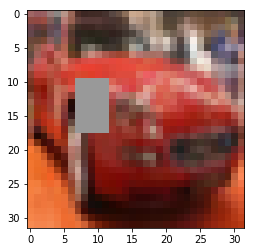

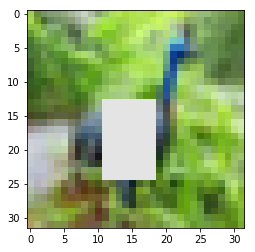

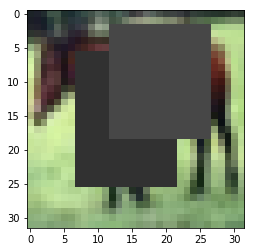

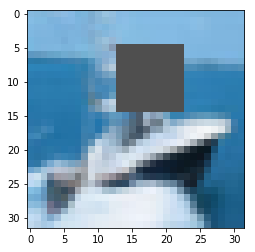

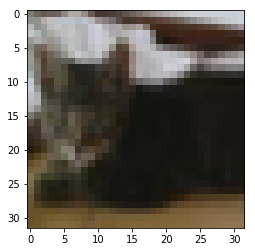

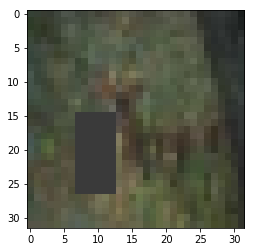

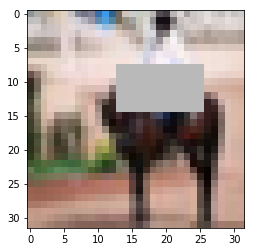

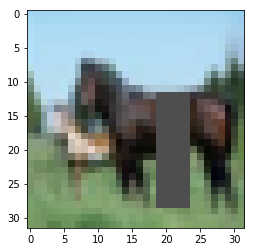

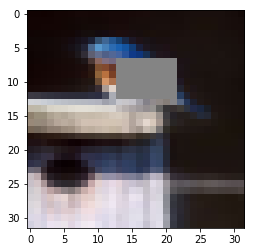

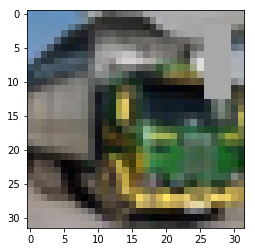

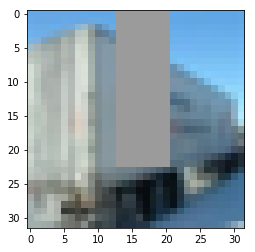

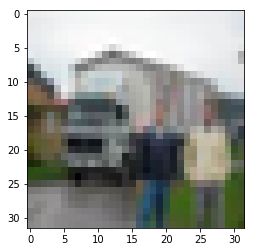

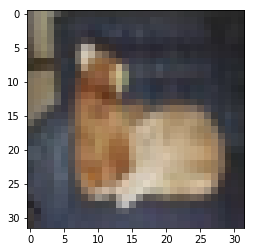

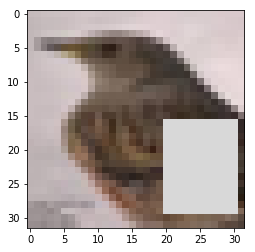

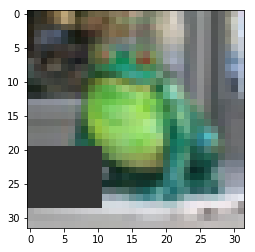

In [10]:
for i in range(20):
  plt.imshow(train_features[i])
  plt.show()